# La loi normale

Imaginons une expérience où les participant·es doivent lire un texte d’une centaine de mots avant de répondre à une question. On mesure à la fois le temps de lecture et l’exactitude de la réponse. Dans ce genre de tâches de lecture, on s’attend à ce que les résultats suivent une loi normale, c’est-à-dire que la plupart des temps de lecture se situent autour d’une moyenne avec une distribution symétrique pour les autres temps de réponse. Le résultat est une courbe en cloche caractéristique :

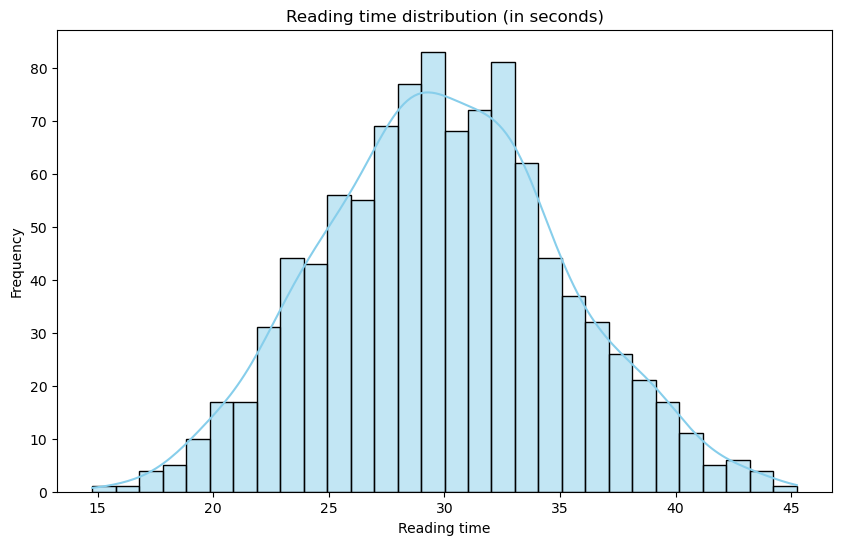

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# generate a normal distribution
data = np.random.normal(loc=30, scale=5, size=1000)

# visualization
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=True, color="skyblue")
plt.title("Reading time distribution (in seconds)")
plt.xlabel("Reading time")
plt.ylabel("Frequency")
plt.show()

## Paramètres de la loi normale

De nombreux phénomènes naturels suivent la loi normale, tant et si bien que l’on va parfois supposer qu’une variable *X* la respecte afin d’effectuer des calculs dessus. La variable sera censée suivre une distribution modèle avec un maximum de valeurs autour de $\mu$, et il sera visuellement facile de ressortir la proportion cumulée des observations de *X* pour une valeur *z* :

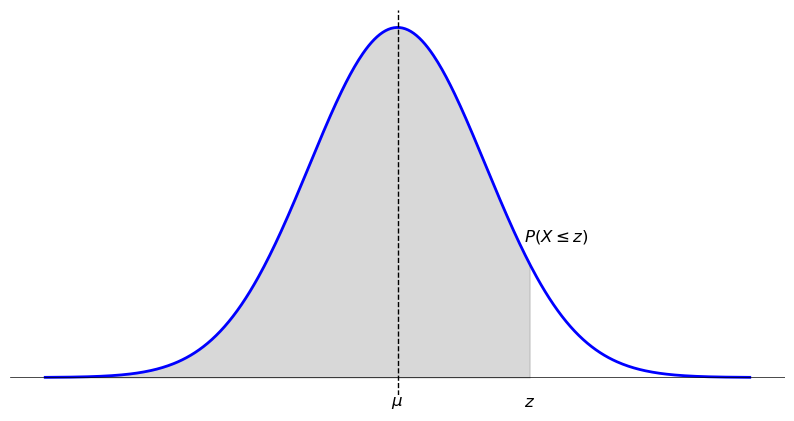

In [2]:
mean = 0
std_dev = 1
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 500)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
z = 1.5

plt.figure(figsize=(10, 5))
plt.plot(x, y, color="blue", lw=2)
plt.axhline(0, color='black', linewidth=0.5)

plt.axvline(mean, color='black', linestyle='--', lw=1)
plt.text(mean, -0.02, r'$\mu$', ha='center', va='top', fontsize=12)

# for z
plt.text(1.5, -0.02, r'$z$', ha='center', va='top', fontsize=12)
plt.text(1.8, 0.15, r'$P(X \leq z)$', ha='center', va='bottom', fontsize=12, color='black')

# shading area under the curve up to Z
x_fill = np.linspace(-4, z, 500)
y_fill = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_fill - mean) / std_dev) ** 2)
plt.fill_between(x_fill, y_fill, color="grey", alpha=0.3)

plt.xticks([])
plt.yticks([])

sns.despine(left=True, bottom=True)

plt.show()

Pour tracer une loi normale, il suffit de connaître deux paramètres :

- $\mu$ : la moyenne
- $\sigma$ : l’écart-type

Pour chaque couple $\mu$, $\sigma$, il existe une loi normale de moyenne $\mu$ et d’ecart-type $\sigma$ :

$$
X \hookrightarrow  \mathcal{N}(\mu,\,\sigma)
$$

Qui répond à l’équation :

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{ -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 }
$$

**Remarques :**
- Un cas particulier est **la loi normale centrée réduite** où la moyenne est égale à 0 et l’écart-type à 1.
- On fait parfois référence à la variance ($\sigma^2$) plutôt qu’à l’écart-type, ce qui ne change rien ni à la distribution ni à sa signification.
- Si on suppose qu’une variable est distribuée normalement, on écrira :

$$
X \sim  \mathcal{N}(\mu,\,\sigma)
$$

### Loi normale avec des moyennes différentes

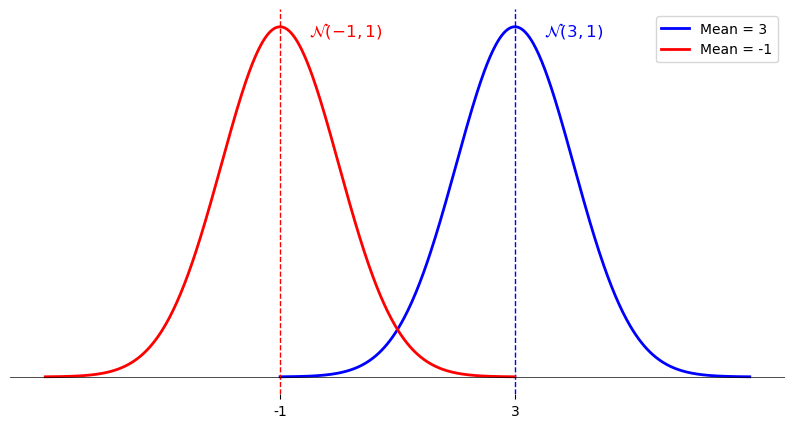

In [3]:
# parameters of the first curve
mean_1 = 3
std_dev_1 = 1
x_1 = np.linspace(mean_1 - 4 * std_dev_1, mean_1 + 4 * std_dev_1, 500)
y_1 = (1 / (std_dev_1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_1 - mean_1) / std_dev_1) ** 2)

# parameters of the second curve
mean_2 = -1
std_dev_2 = 1
x_2 = np.linspace(mean_2 - 4 * std_dev_2, mean_2 + 4 * std_dev_2, 500)
y_2 = (1 / (std_dev_2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_2 - mean_2) / std_dev_2) ** 2)

plt.figure(figsize=(10, 5))

# first curve
plt.plot(x_1, y_1, color="blue", lw=2, label="Mean = 3")
plt.axvline(mean_1, color='blue', linestyle='--', lw=1)
plt.text(mean_1 + 0.5, max(y_1) - 0.01, r"$\mathcal{N}(3, 1)$", color="blue", fontsize=12)

# second curve
plt.plot(x_2, y_2, color="red", lw=2, label="Mean = -1")
plt.axvline(mean_2, color='red', linestyle='--', lw=1)
plt.text(mean_2 + 0.5, max(y_2) - 0.01, r"$\mathcal{N}(-1, 1)$", color="red", fontsize=12)

# display
plt.axhline(0, color='black', linewidth=0.5)
xticks_positions = [-1, 3]
plt.xticks(xticks_positions, labels=[str(x) for x in xticks_positions])
plt.yticks([])
plt.legend()
sns.despine(left=True, bottom=True)

plt.show()

### Loi normale avec des écarts-types différents

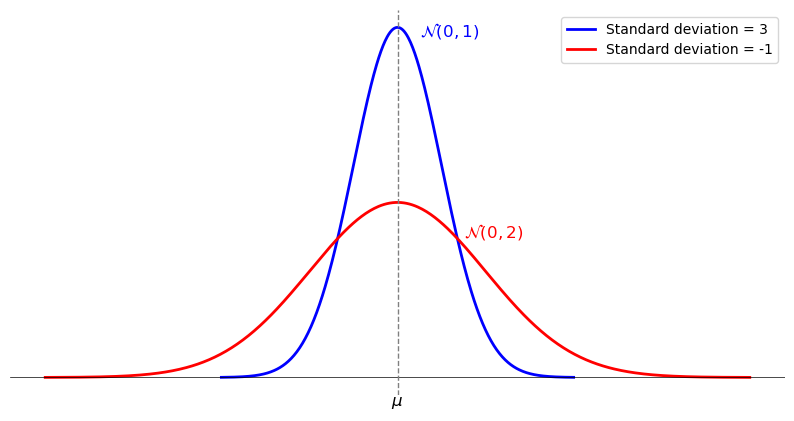

In [4]:
# parameters of the first curve
mean_1 = 0
std_dev_1 = 1
x_1 = np.linspace(mean_1 - 4 * std_dev_1, mean_1 + 4 * std_dev_1, 500)
y_1 = (1 / (std_dev_1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_1 - mean_1) / std_dev_1) ** 2)

# parameters of the second curve
mean_2 = 0
std_dev_2 = 2
x_2 = np.linspace(mean_2 - 4 * std_dev_2, mean_2 + 4 * std_dev_2, 500)
y_2 = (1 / (std_dev_2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_2 - mean_2) / std_dev_2) ** 2)

plt.figure(figsize=(10, 5))

# first curve
plt.plot(x_1, y_1, color="blue", lw=2, label="Standard deviation = 3")
plt.text(mean_1 + 0.5, max(y_1) - 0.01, r"$\mathcal{N}(0, 1)$", color="blue", fontsize=12)

# second curve
plt.plot(x_2, y_2, color="red", lw=2, label="Standard deviation = -1")
plt.text(mean_2 + 1.5, max(y_2) - 0.04, r"$\mathcal{N}(0, 2)$", color="red", fontsize=12)

# display
plt.text(mean_1, -0.02, r'$\mu$', ha='center', va='top', fontsize=12)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(mean_1, color='grey', linestyle='--', lw=1)
plt.xticks([])
plt.yticks([])
plt.legend()
sns.despine(left=True, bottom=True)

plt.show()

## La loi normale centrée réduite en pratique

### La fonction de distribution cumulative

#### Pour un certain écart-type

Dans la loi normale centrée réduite, les valeurs des écarts-types ($1 \sigma$, $2\sigma$, …) correspondent à des probabilités cumulées (ou proportions) de la population qui se trouvent à gauche de chaque seuil. Par exemple, à 3 écarts-types sous la moyenne ($−3 \sigma$), on voit d’après le diagramme que 0,1 % des valeurs se situent sous ce seuil ; pour $- 1\sigma$ on a 15,8 % de la population. Et comme la loi normale est symétrique, les écarts-types positifs et négatifs ont des significations identiques en termes de probabilités cumulées.



![La loi normale](./figs/standard_deviations.png)

#### Pour $X \leq z$

Supposons que nous recherchons la proportion cumulée d’individus pour lesquels une certaine variable *X* qui suit la loi normale centrée réduite a une valeur inférieure ou égale à 1,31. En termes mathématiques : soit $X \sim  \mathcal{N}(0,1)$. Pour quelle proportion d’individus $\mathbb{P}(X \leq 1.31)$ ?

**Remarque :** On écrit aussi $F(1.31)$, où *F()* représente la fonction de distribution cumulative pour la valeur 1,31.

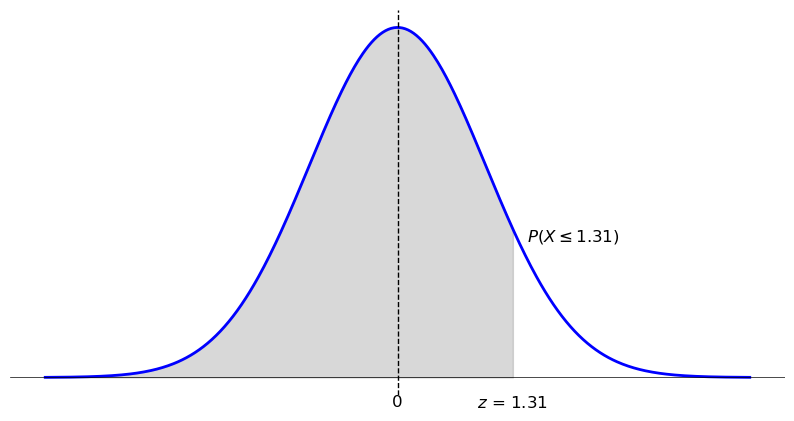

In [5]:
mean = 0
std_dev = 1
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 500)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
z = 1.31

plt.figure(figsize=(10, 5))
plt.plot(x, y, color="blue", lw=2)
plt.axhline(0, color='black', linewidth=0.5)

plt.axvline(mean, color='black', linestyle='--', lw=1)
plt.text(mean, -0.02, r'0', ha='center', va='top', fontsize=12)

# for z
plt.text(1.31, -0.02, r'$z$ = 1.31', ha='center', va='top', fontsize=12)
plt.text(2, 0.15, r'$P(X \leq 1.31)$', ha='center', va='bottom', fontsize=12, color='black')

# shading area under the curve up to Z
x_fill = np.linspace(-4, z, 500)
y_fill = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_fill - mean) / std_dev) ** 2)
plt.fill_between(x_fill, y_fill, color="grey", alpha=0.3)

plt.xticks([])
plt.yticks([])

sns.despine(left=True, bottom=True)

plt.show()

Une méthode consiste à se référer à la table de la loi normale centrée réduite en repérant la valeur à l’intersection de **1.3** et **0.01**, soit **0.9049** :

![La table de la loi normale](./figs/normal_law.png)

Une autre méthode, plus rapide, utilise la bibliothèque *Scipy* et la fonction de distribution cumulative (`.cdf()`) du module `scipy.stats.norm` :

In [6]:
from scipy.stats import norm

z_value = 1.31
p = norm.cdf(z_value)

print(p)

0.904902082204761


On peut interpréter ce résultat comme une probabilité très élevée que la variable aléatoire *X* soit inférieure ou égale à 1,31. En effet, pour $X \leq 1.31$, on trouve selon la table de la loi normale $\mathbb{P} = 0.9049$ soit en termes de pourcentages 90,49 % des individus.

#### Pour $X \geq z$

Dans le cas où cette fois-ci on cherche la probabilité $P(X \geq 1.31)$, on peut reformuler :

$$
\begin{align*}
\mathbb{P}(X \geq 1.31) &= 1 - \mathbb{P}(X \leq 1.31) \\
&= 1 - 0.9049 \\
&= 0.0951
\end{align*}
$$

Et avec Python :

In [7]:
p = 1 - norm.cdf(z_value)

print(p)

0.09509791779523902


#### Pour $X \leq -z$

Si l’on cherche maintenant la proportion d’individus pour $X \leq -1.31$, il faut se rappeler que la distribution normale est symétrique, aussi calculer $F(-1.31)$ revient à calculer $1 - F(1.31)$, aussi :

$$
\begin{align*}
\mathbb{P}(X \leq -1.31) &= 1 - \mathbb{P}(X \leq 1.31) \\
&= 1 - 0.9049 \\
&= 0.0951
\end{align*}
$$

#### Pour $X \geq -z$

Dernier cas de figure, celui où l’on cherche la proportion d’individus pour laquelle $X \geq -z$. Encore une fois, grâce à la symétrie de la distribution, on arrive à la relation :

$$
\begin{align*}
\mathbb{P}(X \geq −z) &= 1 − \mathbb{P}(X \leq −z) \\
&= 1 − F(−z)
\end{align*}
$$

Or, nous savons que $F(-z) = 1 - F(z)$, donc :

$$
\begin{align*}
\mathbb{P}(X \geq −z) &= 1 − (1 - F(z)) \\
&= F(z)
\end{align*}
$$

**Remarque :** la résolution de l’équation implique que $\mathbb{P}(X \geq −z) = - F(z)$, ce qui dans le contexte des probabilités ne fait pas sens, une probabilité étant positive (entre 0 et 1).

#### Pour $X_1 \leq X \leq X_2$

Dans le cas spécifique où l’on recherche une étendue, on applique la règle de probabilités :

$$
\mathbb{P}(X_1 \leq X \leq X_2) = \mathbb{P}(X \leq X_2) − \mathbb{P}(X \leq X_1)
$$

Par exemple, si $X_1$ est situé à un écart-type en dessous de la moyenne et $X_2$ à un écart-type au-dessus de la moyenne, il y a environ 68,26 % de chances que *X* se situe dans une plage entre les deux seuils.

### La recherche de quantiles

On peut appréhender le **quantile** comme un repère dans un ensemble de données qui divise la distribution en portions. Ainsi, le quantile à *q* est la valeur *x* telle que $\mathbb{P}(X \leq x) = q$. Par exemple, le quantile à 90,15 % est 1,29 parce que $F(1.29) = 0.9015$.

Comme dans la table de la loi normale il n’existe pas de quantile pour une probabilité inférieure à 50 %, il faut se rappeler encore une fois de la propriété de symétrie de la loi normale pour établir que trouver le quantile correspondant à une probabilité donnée revient à chercher l’inverse du quantile pour 1 − la probabilité.

En somme, pour déterminer le quantile correspondant à 25 %, on pose $\mathbb{P}(Z \leq a) = 0.25$ avant de chercher la valeur de $a$ telle que la probabilité cumulée jusqu’à *a* soit de 0,25. Puisque la loi normale est symétrique, le quantile qui correspond à une probabilité cumulée de 75 % est environ $a = 0.67$. De là, on déduit que le quantile correspondant à 25 % est de $-0.67$.

La relation à retenir est :

$$
z_\alpha = −z_{(1 − \alpha)}
$$

Avec Python, on peut recourir à la méthode `.ppf()` du module `scipy.stats.norm` qui calcule directement l’inverse de la fonction de distribution cumulative :

In [8]:
a = norm.ppf(0.25)

print(a)

-0.6744897501960817


## Pour une loi normale quelconque

### La fonction de distribution cumulative

Dans la réalité, jamais on ne rencontre de lois normales centrées réduites directement issues des données brutes. Elles sont en revanche très courantes après des transformations statistiques en raison du théorème central limite qui stipule que la somme de nombreuses variables aléatoires indépendantes, quelle que soit leur distribution initiale, tend vers une distribution normale lorsque le nombre d’échantillons est suffisamment grand. Aussi, de très nombreux phénomènes naturels, à partir du moment où ils sont observés une quantité de fois suffisantes, peuvent se traduire par une loi normale.

Pour ensuite avoir accès aux propriétés de la loi normale centrée réduite, il faut centrer réduire la variable observée (si bien sûr on admet que $X \sim \mathcal{N}(\mu, \, \sigma)$) :

$$
Z = \frac{X − \mu}{\sigma} \sim \mathcal{N}(0, \, 1)
$$

Par exemple, admettons une variable *X* dont la moyenne est 11 et l’écart-type 2,5, de telle manière que $X \sim \mathcal{N}(11, 2.5)$. On cherche ensuite la proportion d’individus pour lesquels $X \leq 13$. Selon la formule de la **normalisation**, on obtient la relation mathématique suivante :

$$
\begin{align*}
\mathbb{P}(X \leq 13) &= \mathbb{P}(\frac{X - 11}{2.5} \leq \frac{13 - 11}{2.5}) \\
&= \mathbb{P}(Z \leq 0.8) \\
&= 0.7881
\end{align*}
$$

### La recherche de quantiles

Dans ce cas-là, nous allons d’abord *dénormaliser* les données selon la relation :

$$
Q_\alpha = \mu + \sigma \times z_\alpha
$$

Aussi, pour le quantile à 90 % d’une loi normale $\mathcal{N}(11, \, 2.5)$, on obtient :

$$
Q_{0.9} = 11 + 2.5 \times z_{0.9}
$$

Or, d’après la table de la loi normale $Z_{0.9} \approx 1.28$, donc :

$$
\begin{align*}
Q_{0.9} &= 11 + 2.5 \times 1.28 \\
&= 11 + 3.2 \\
&= 14.2
\end{align*}
$$